In [ ]:
#%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Load the data from an Excel file
file_path = "./data_customer_classification.xlsx"
data = pd.read_excel(file_path)

# Display basic information about the data
print("Data Info:")
print(data.info())

# Display the first few rows of the data
print("\nFirst 5 rows of the data:")
print(data.head())

# Summary statistics of the data
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB
None

First 5 rows of the data:
  customer_id trans_date  tran_amount
0      CS5295 2013-02-11           35
1      CS4768 2015-03-15           39
2      CS2122 2013-02-26           52
3      CS1217 2011-11-16           99
4      CS1850 2013-11-20           78

Summary Statistics:
                          trans_date    tran_amount
count                         125000  125000.000000
mean   2013-04-13 12:01:16.031999744      64.991912
min              2011-05-16 00:00:00      10.000000
25%              2012-04-29 00:00:00      47.000000
50%              20

# Analisis Exploratorio 

In [ ]:
# # Obtener los valores únicos y contar cuántas veces se repiten
valores_unicos = data["customer_id"].unique()
conteo_repeticiones = data["customer_id"].value_counts()

print("Valores únicos:")
print(len(valores_unicos))

print("\nConteo de repeticiones:")
print(conteo_repeticiones)

Valores únicos:
6889

Conteo de repeticiones:
customer_id
CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
          ..
CS8559     4
CS7716     4
CS8376     4
CS7224     4
CS7333     4
Name: count, Length: 6889, dtype: int64


In [ ]:
data["shopping_frequency"] = data.groupby("customer_id")["tran_amount"].transform(
    "count"
)

In [ ]:
# cantidad promedio que gasta cada cliente
data["average_spending"] = data.groupby("customer_id")["tran_amount"].transform("mean")

In [ ]:
data

,customer_id,trans_date,tran_amount,shopping_frequency,average_spending
0,CS5295,2013-02-11,35,25,65.480000
1,CS4768,2015-03-15,39,26,66.192308
2,CS2122,2013-02-26,52,23,71.652174
3,CS1217,2011-11-16,99,20,71.550000
4,CS1850,2013-11-20,78,24,79.500000
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,20,48.000000
124996,CS7232,2014-08-19,38,12,41.500000
124997,CS8731,2014-11-28,42,15,43.600000
124998,CS8133,2013-12-14,13,12,42.416667


In [ ]:
data["max_spending"] = data.groupby("customer_id")["tran_amount"].transform("max")

In [ ]:
data

,customer_id,trans_date,tran_amount,shopping_frequency,average_spending,max_spending
0,CS5295,2013-02-11,35,25,65.480000,104
1,CS4768,2015-03-15,39,26,66.192308,105
2,CS2122,2013-02-26,52,23,71.652174,105
3,CS1217,2011-11-16,99,20,71.550000,104
4,CS1850,2013-11-20,78,24,79.500000,105
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,20,48.000000,79
124996,CS7232,2014-08-19,38,12,41.500000,72
124997,CS8731,2014-11-28,42,15,43.600000,77
124998,CS8133,2013-12-14,13,12,42.416667,76


In [ ]:
# Split the data into features and target variable
X = data[["shopping_frequency", "average_spending", "max_spending"]]
# y = pd.get_dummies(data["value_category"])
# y
X

,shopping_frequency,average_spending,max_spending
0,25,65.480000,104
1,26,66.192308,105
2,23,71.652174,105
3,20,71.550000,104
4,24,79.500000,105
...,...,...,...
124995,20,48.000000,79
124996,12,41.500000,72
124997,15,43.600000,77
124998,12,42.416667,76


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Añadir la columna de clusters al dataframe original
data["cluster"] = clusters

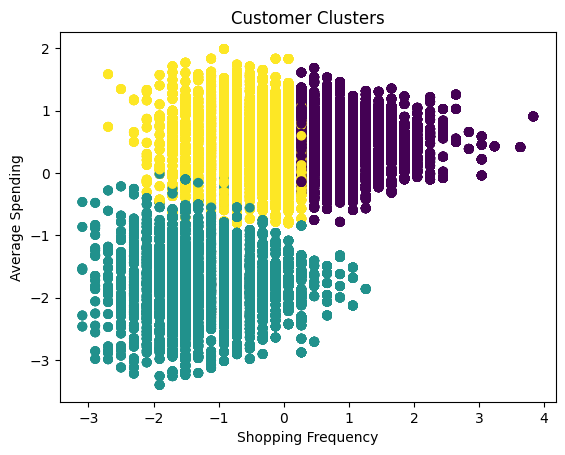

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="viridis")
plt.xlabel("Shopping Frequency")
plt.ylabel("Average Spending")
plt.title("Customer Clusters")
plt.show()

In [28]:
# Mostrar los centroides de los clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(
    centroids, columns=["shopping_frequency", "average_spending", "max_spending"]
)
print("\nCluster Centroids:")
print(centroids_df)


Cluster Centroids:
   shopping_frequency  average_spending  max_spending
0           24.441479         70.369083    102.877451
1           14.216257         44.777615     74.908200
2           17.427949         69.860789    101.354782
